## Project Name: Automatic Optimal N-Shot learning for Brain Tumor Detection. (Using CNN)
**Description:**

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.

Despite deep convolutional neural networks achieved impressive progress in medical image computing and analysis, its paradigm of supervised learning demands a large number of training images and complex hyperparameter optimization processes. In clinical practices, collection of huge number of MRIs is difficult to acquire. We developed a deep learning pipeline with few-shot learning with automatic hyperparameter optimization for brain tumor detection.

In [1]:
!pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importing required Libraries:
import cv2
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

In [6]:
# Datapath:
data_path = "C:/Users/A-B-H-I-S-H-E-K/Desktop/Deployment/around-250-images/"

In [9]:
# shape of image:
im = cv2.imread(data_path + 'yes/Y1.jpg')
print(im.shape)

(218, 180, 3)


In [10]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
train_DataGen = ImageDataGenerator(
                                   rescale = 1./255,
                                   rotation_range = 20,
                                   validation_split = 0.2
                                   )

In [32]:
# this is a generator that will read pictures found in at train_data_path and indefinitely generate batches of augmented image data
training_data = train_DataGen.flow_from_directory(
                                                  directory = data_path,
                                                  target_size = (128,128),
                                                  batch_size = 32,
                                                  class_mode = 'binary',
                                                  subset = 'training'
                                                 )

Found 406 images belonging to 3 classes.


In [12]:
# this is a generator that will read pictures found in at train_data_path and indefinitely generate batches of augmented image data
validation_data = train_DataGen.flow_from_directory(
                                                    directory = data_path,
                                                    target_size = (128,128),
                                                    batch_size = 3,
                                                    class_mode = 'binary',
                                                    subset = 'validation'
                                                   )

Found 100 images belonging to 3 classes.


In [33]:
# Training data class labels:
training_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [14]:
# Validation data class labels:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# creating function for plotting images:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

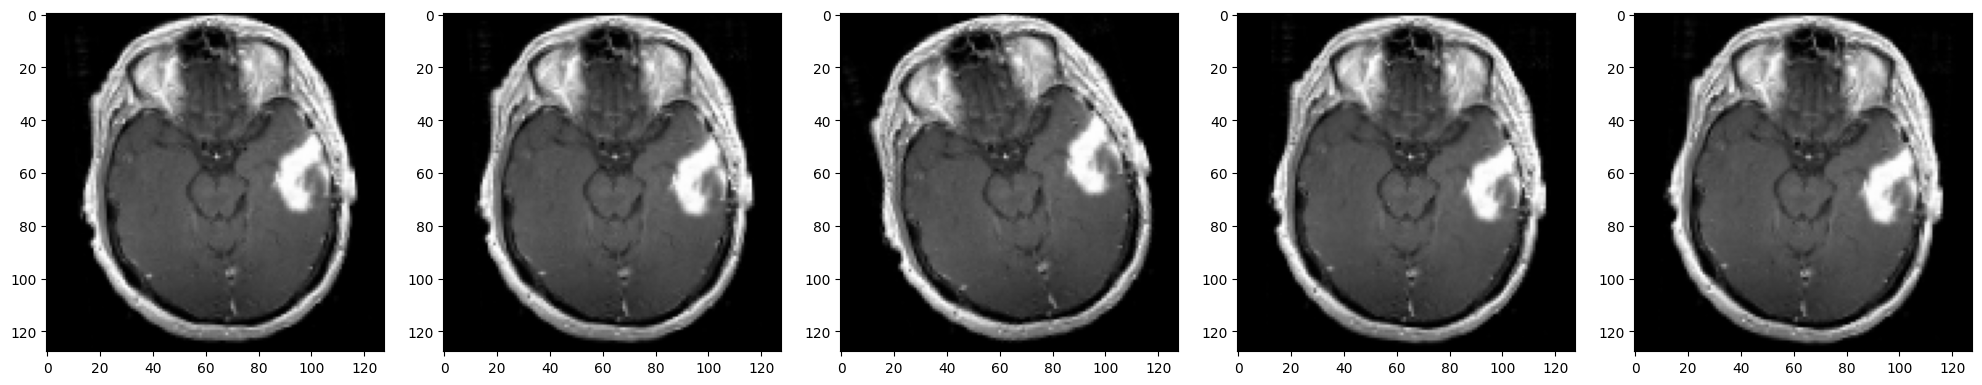

In [16]:
# Plotting images:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [19]:
# Creating model:
model = Sequential()

# Convolutional layer:
model.add(Conv2D(input_shape = (128,128,3), activation = 'relu', filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 64, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 128, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization:
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Convolutional layer:
model.add(Conv2D(filters = 256, activation = 'relu', kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

# BatchNormalization:
model.add(BatchNormalization())

# MaxPooling layer:
model.add(MaxPooling2D(pool_size = (2,2)))

# Dropout layer:
model.add(Dropout(0.5))

# Flatten layer:
model.add(Flatten())

# Dense layer:
model.add(Dense(64, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.2))

# Dense layer:
model.add(Dense(128, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.4))

# Dense layer:
model.add(Dense(256, activation = 'relu'))

# Dropout layer:
model.add(Dropout(0.5))

# Output layer:
model.add(Dense(2, activation = 'softmax'))

In [20]:
# model summary:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 batch_normalization_5 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                      

In [40]:
# compile the model:
model.compile(
              optimizer = Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [41]:
# Used Early stopping to avoid overfitting 
callback = tf.keras.callbacks.EarlyStopping(
                                            monitor='val_loss', 
                                            mode = 'min', 
                                            patience=5
                                           )

In [42]:
# Fitting the training data to our model:
history = model.fit_generator(
                              training_data,
                              validation_data = validation_data,
                              epochs = 100,
                              verbose = 0,
                              shuffle = True,
                              callbacks = [callback]
                             )

C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Temp\ipykernel_16516\2390283867.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Temp\ipykernel_16516\2390283867.py", line 2, in <module>

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2913, in fit_generator

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\A-B-H-I-S-H-E-K\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 2 2 1 0 0 1 0 0 1 0 2 2 0 0 2 0 0 1 0 0 2 2 1 2 0 0 0 0 2 0 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_9811]

In [27]:
type(model)

keras.src.engine.sequential.Sequential

In [26]:
# On which iteration early stopping is called:
len(history.history['loss'])

NameError: name 'history' is not defined

In [32]:
results = model.evaluate(validation_data)
results

17/17 [==============================] - 0s 21ms/step - loss: 1.3487 - accuracy: 0.6800


[1.3486649990081787, 0.6800000071525574]

In [33]:
print('Test accuracy : ', results[1])

Test accuracy :  0.6800000071525574


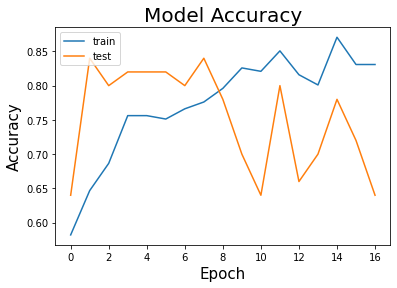

In [34]:
# Summarize history for accuracy:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

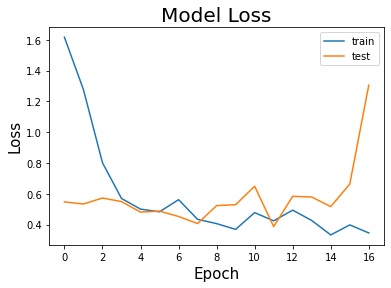

In [35]:
# summarize history for loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.legend(['train', 'test'], loc='upper right')
plt.show()